In [1]:
import random
import torch
from sklearn.model_selection import KFold
import math
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

https://github.com/secondlevel/EEG-classification/tree/main?tab=readme-ov-file

In [2]:
class DeepConvNet_ELU(torch.nn.Module):
    def __init__(self, n_output):
        super(DeepConvNet_ELU, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 25, kernel_size=(1,5),bias=False),
            nn.Conv2d(25, 25, kernel_size=(30,1),bias=False),
            nn.BatchNorm2d(25, eps=1e-05, momentum=0.1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=(1,2)),
            #nn.Dropout(p=0.2),

            nn.Conv2d(25, 50, kernel_size=(1,5),bias=False),
            nn.BatchNorm2d(50, eps=1e-05, momentum=0.1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=(1,2)),
            #nn.Dropout(p=0.2),

            nn.Conv2d(50, 100, kernel_size=(1,5),bias=False),
            nn.BatchNorm2d(100, eps=1e-05, momentum=0.1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=(1,2)),
            #nn.Dropout(p=0.2),

            nn.Conv2d(100, 200, kernel_size=(1,5),bias=False),
            nn.BatchNorm2d(200, eps=1e-05, momentum=0.1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=(1,2)),
            #nn.Dropout(p=0.2),

            nn.Flatten(),
            nn.Linear(1600,n_output,bias=True)
        )

    def forward(self, x):
        out = self.model(x)
        return out
    

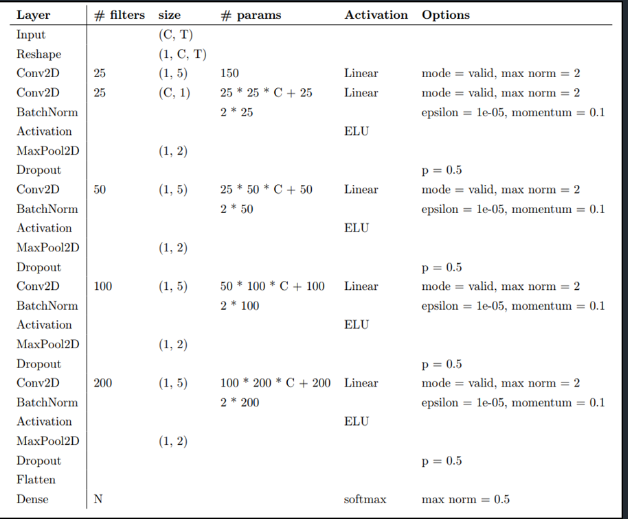